In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from sklearn.preprocessing import LabelEncoder
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import mean_squared_error, r2_score


# Load the LCL dataset

In [ ]:
import os

folder_path = '/content/drive/MyDrive/Low Carbon dataset'
file_list = os.listdir(folder_path)
csv_files = [f for f in file_list if f.endswith('.csv')]

print(csv_files)


['LCL-June2015v2_0.csv', 'LCL-June2015v2_1.csv', 'LCL-June2015v2_2.csv', 'LCL-June2015v2_3.csv', 'LCL-June2015v2_4.csv', 'LCL-June2015v2_5.csv', 'LCL-June2015v2_6.csv', 'LCL-June2015v2_7.csv', 'LCL-June2015v2_8.csv', 'LCL-June2015v2_9.csv', 'LCL-June2015v2_10.csv', 'LCL-June2015v2_11.csv', 'LCL-June2015v2_12.csv', 'LCL-June2015v2_13.csv', 'LCL-June2015v2_14.csv', 'LCL-June2015v2_15.csv', 'LCL-June2015v2_16.csv', 'LCL-June2015v2_17.csv', 'LCL-June2015v2_18.csv', 'LCL-June2015v2_19.csv', 'LCL-June2015v2_20.csv', 'LCL-June2015v2_22.csv', 'LCL-June2015v2_21.csv', 'LCL-June2015v2_23.csv', 'LCL-June2015v2_24.csv', 'LCL-June2015v2_25.csv', 'LCL-June2015v2_26.csv', 'LCL-June2015v2_27.csv', 'LCL-June2015v2_28.csv', 'LCL-June2015v2_29.csv', 'LCL-June2015v2_30.csv', 'LCL-June2015v2_31.csv', 'LCL-June2015v2_32.csv', 'LCL-June2015v2_33.csv', 'LCL-June2015v2_34.csv', 'LCL-June2015v2_35.csv', 'LCL-June2015v2_36.csv', 'LCL-June2015v2_37.csv', 'LCL-June2015v2_38.csv', 'LCL-June2015v2_39.csv', 'LCL-June

In [ ]:
import pandas as pd

# List to hold DataFrames
df_list = []

# Loop through each file and read into a DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate all DataFrames
LCL_df = pd.concat(df_list, ignore_index=True)


In [ ]:
LCL_df

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0
...,...,...,...,...
80999995,MAC003343,Std,2012-09-27 07:00:00.0000000,0.461
80999996,MAC003343,Std,2012-09-27 07:30:00.0000000,0.268
80999997,MAC003343,Std,2012-09-27 08:00:00.0000000,0.149
80999998,MAC003343,Std,2012-09-27 08:30:00.0000000,0.198


In [ ]:
# Strip leading/trailing spaces from column names
LCL_df.columns = LCL_df.columns.str.strip()

# Convert DateTime column to datetime
LCL_df['DateTime'] = pd.to_datetime(LCL_df['DateTime'])

# Convert 'KWH/hh (per half hour)' column to numeric
LCL_df['KWH/hh (per half hour)'] = pd.to_numeric(LCL_df['KWH/hh (per half hour)'], errors='coerce')

In [ ]:
LCL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81000000 entries, 0 to 80999999
Data columns (total 4 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   LCLid                   object        
 1   stdorToU                object        
 2   DateTime                datetime64[ns]
 3   KWH/hh (per half hour)  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.4+ GB


In [ ]:
LCL_df.isnull().sum()

LCLid                        0
stdorToU                     0
DateTime                     0
KWH/hh (per half hour)    2659
dtype: int64

## Handling Missing Values

In [ ]:
# Drop rows with missing values
LCL_df = LCL_df.dropna()

LCL_df.isnull().sum()

LCLid                     0
stdorToU                  0
DateTime                  0
KWH/hh (per half hour)    0
dtype: int64

## Converting Data Types

In [ ]:
# Convert columns to appropriate data types if necessary
LCL_df['LCLid'] = LCL_df['LCLid'].astype('category')
LCL_df['stdorToU'] = LCL_df['stdorToU'].astype('category')

<ipython-input-14-f1ee69281f09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCL_df['LCLid'] = LCL_df['LCLid'].astype('category')
<ipython-input-14-f1ee69281f09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCL_df['stdorToU'] = LCL_df['stdorToU'].astype('category')


# EDA

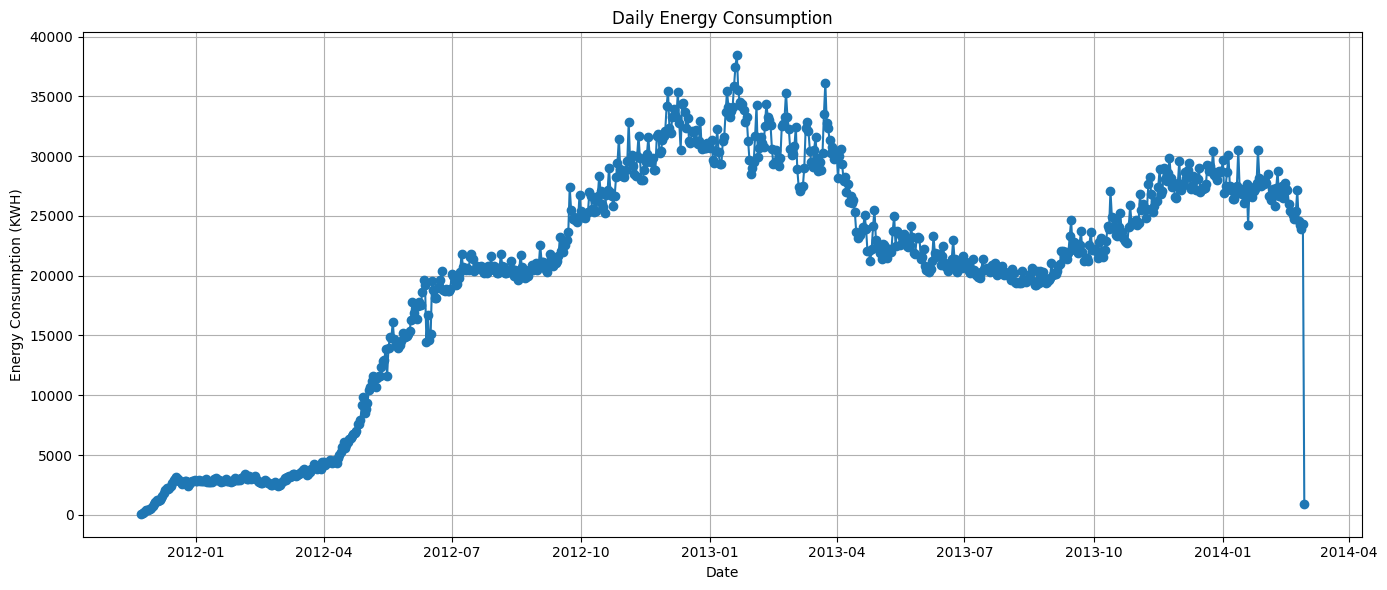

In [ ]:
# Daily and Weekly energy consumption
daily_energy = LCL_df.resample('D', on='DateTime')['KWH/hh (per half hour)'].sum()

plt.figure(figsize=(14, 6))

plt.plot(daily_energy.index, daily_energy.values, marker='o', linestyle='-')
plt.title('Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (KWH)')
plt.grid(True)

plt.tight_layout()
plt.show()


## Make Daily Dataframe

In [ ]:
# Creating the daily DataFrame
daily_df = LCL_df.resample('D', on='DateTime').agg({
    'KWH/hh (per half hour)': 'sum',
    'stdorToU': 'first',
    'LCLid': 'first',
}).reset_index()

daily_df.rename(columns={'KWH/hh (per half hour)': 'Daily_KWH'}, inplace=True)



In [ ]:
daily_df

,DateTime,Daily_KWH,stdorToU,LCLid
0,2011-11-23,81.730000,Std,MAC000145
1,2011-11-24,188.965000,Std,MAC000145
2,2011-11-25,262.675000,Std,MAC000145
3,2011-11-26,374.719000,Std,MAC000145
4,2011-11-27,398.002001,Std,MAC000145
...,...,...,...,...
824,2014-02-24,24573.627003,Std,MAC000002
825,2014-02-25,24224.568005,Std,MAC000002
826,2014-02-26,23938.275998,Std,MAC000002
827,2014-02-27,24309.677000,Std,MAC000002


# ARIMA Model

## Check for Stationarity

In [ ]:
# Check for Stationarity Again
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    if result[1] > 0.05:
        print("Data is not stationary")
    else:
        print("Data is stationary")

## Grid Search

In [ ]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Function to perform grid search
def grid_search_arima(data, p_values, d_values, q_values):
    best_aic = np.inf
    best_order = None
    best_model = None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(data, order=(p, d, q))
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)
                best_model = model_fit
        except:
            continue

    return best_order, best_model

## DAILY DF

In [ ]:
# Make the Data Stationary
data_diff = daily_df['Daily_KWH'].diff().dropna()

adf_test(data_diff)

ADF Statistic: -2.771817267836601
p-value: 0.062413602885564023
Critical Value (1%): -3.4384791480370605
Critical Value (5%): -2.865128114094396
Critical Value (10%): -2.5686806329529874
Data is not stationary


In [ ]:
# Make the Data Stationary
data_diff2 = data_diff.diff().dropna()

adf_test(data_diff)

ADF Statistic: -2.771817267836601
p-value: 0.062413602885564023
Critical Value (1%): -3.4384791480370605
Critical Value (5%): -2.865128114094396
Critical Value (10%): -2.5686806329529874
Data is not stationary


In [ ]:
# Grid search for best p, d, q values
p_values = range(0, 10)
d_values = range(0, 4)
q_values = range(0, 10)
arima_best_order, arima_best_model = grid_search_arima(data_diff2, p_values, d_values, q_values)

In [ ]:
print('Best ARIMA order:', arima_best_order)
print(arima_best_model.summary())

Best ARIMA order: (9, 3, 6)
                               SARIMAX Results                                
Dep. Variable:              Daily_KWH   No. Observations:                  827
Model:                 ARIMA(9, 3, 6)   Log Likelihood                   0.000
Date:                Mon, 05 Aug 2024   AIC                             32.000
Time:                        17:56:34   BIC                            107.427
Sample:                             0   HQIC                            60.935
                                - 827                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.9874   2.51e-08  -1.59e+08      0.000      -3.987      -3.987
ar.L2         -3.9832    2.7e-08  -1.48e+08      0.000      -3.983      -3.983
ar.L3          3.9646   

In [ ]:
split_point = int(len(data_diff2) * 0.9)
train_daily = data_diff2[:split_point]
test_daily = data_diff2[split_point:]

In [ ]:
# Fit ARIMA model on training data
arima_daily_model = ARIMA(train_daily, order=(9,3,6))
model_fit_daily = arima_daily_model.fit()

# Forecast future values
forecast_steps = len(test_daily)
arima_forecast = model_fit_daily.forecast(steps=forecast_steps)


## Visualize Forecasted Values

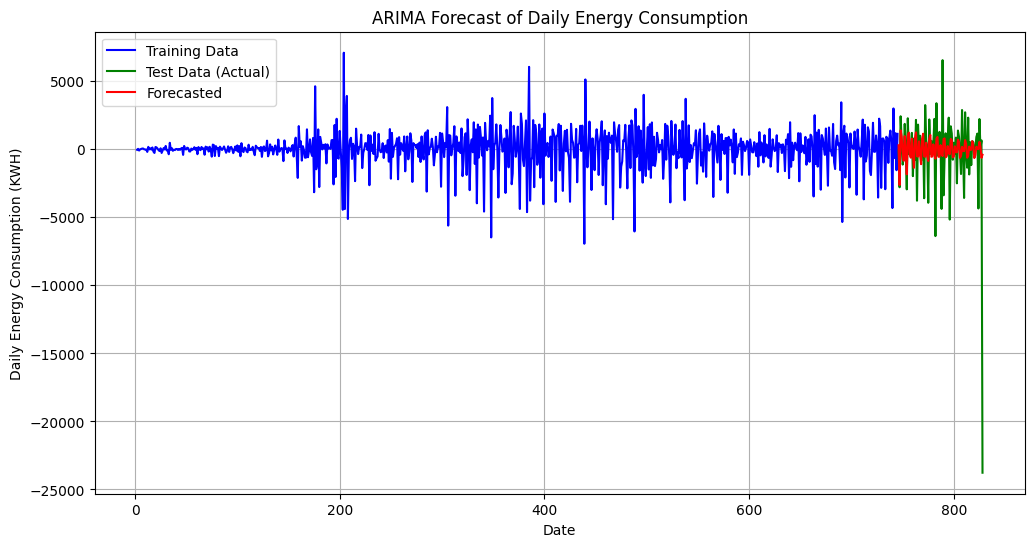

In [ ]:
# Plotting actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_daily.index, train_daily, label='Training Data', color='blue')
plt.plot(test_daily.index, test_daily, label='Test Data (Actual)', color='green')
plt.plot(test_daily.index, arima_forecast, label='Forecasted', color='red')
plt.title('ARIMA Forecast of Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Daily Energy Consumption (KWH)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
arima_me = np.mean(arima_forecast - test_daily)

arima_mse = mean_squared_error(test_daily, arima_forecast)

arima_mae = np.mean(np.abs(arima_forecast - test_daily))

arima_rmse = mean_squared_error(test_daily, arima_forecast, squared=False)

arima_r2 = r2_score(test_daily, arima_forecast)

print(f"Mean Error (ME): {arima_me}")
print(f"Mean Squared Error (MSE): {arima_mse}")
print(f"Mean Absolute Error (MAE): {arima_mae}")
print(f"Root Mean Squared Error (RMSE): {arima_rmse}")
print(f"R-squared (R^2): {arima_r2}")

Mean Error (ME): 26.435184689726203
Mean Squared Error (MSE): 10472261.216690443
Mean Absolute Error (MAE): 1843.2813176032146
Root Mean Squared Error (RMSE): 3236.0873314375253
R-squared (R^2): 0.05582970019952793


# Prophet Forcasting Model

In [ ]:
import pandas as pd
from prophet import Prophet

# Rename columns
df = daily_df.rename(columns={'DateTime': 'ds', 'Daily_KWH': 'y'})

# Convert 'ds' to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Ensure 'ds' is in datetime format and sort by date
df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values(by='ds')


In [ ]:
# Define the split point (e.g., 90% train, 10% test)
split_date = df['ds'].quantile(0.9)

# Split the data
train_df = df[df['ds'] <= split_date]
test_df = df[df['ds'] > split_date]

print(f"Training set from {train_df['ds'].min()} to {train_df['ds'].max()}")
print(f"Testing set from {test_df['ds'].min()} to {test_df['ds'].max()}")


Training set from 2011-11-23 00:00:00 to 2013-12-07 00:00:00
Testing set from 2013-12-08 00:00:00 to 2014-02-28 00:00:00


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, r2_score

def evaluate_model(changepoint_prior_scale, seasonality_prior_scale):
    # Initialize the Prophet model with hyperparameters
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        daily_seasonality=False,
        weekly_seasonality=False,
        yearly_seasonality=False
    )

    # Fit the model on the training data
    model.fit(train_df)

    # Make predictions on the test data
    future = test_df[['ds']]  # Ensure it contains only the 'ds' column
    forecast = model.predict(future)

    # Merge the forecast with actual values from the test set
    result = pd.merge(test_df[['ds', 'y']], forecast[['ds', 'yhat']], on='ds')

    # Extract actual and predicted values
    y_true = result['y']
    y_pred = result['yhat']

    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)

    return mae


In [ ]:
import numpy as np

# Define hyperparameter ranges
changepoint_prior_scales = [0.00001,0.00005,0.001, 0.01, 0.1, 1.0]
seasonality_prior_scales = [0.00001,0.00005,0.001, 0.01, 0.1, 1.0]

# Perform grid search
results = []
for cps in changepoint_prior_scales:
    for sps in seasonality_prior_scales:
        mae = evaluate_model(cps, sps)
        results.append((cps, sps, mae))
        print(f"Changepoint Prior Scale: {cps}, Seasonality Prior Scale: {sps}, MAE: {mae}")




DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/npn19ljz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/x3u4n7kb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86776', 'data', 'file=/tmp/tmplo5qlly9/npn19ljz.json', 'init=/tmp/tmplo5qlly9/x3u4n7kb.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_model4lsazpaf/prophet_model-20240805181013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:10:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/jfvyz1zm.json
DE

Changepoint Prior Scale: 1e-05, Seasonality Prior Scale: 1e-05, MAE: 5952.191537374676


18:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/0mdvm7o2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/b9240tdi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44447', 'data', 'file=/tmp/tmplo5qlly9/0mdvm7o2.json', 'init=/tmp/tmplo5qlly9/b9240tdi.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelx38cdtyo/prophet_model-20240805181016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:10:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

Changepoint Prior Scale: 1e-05, Seasonality Prior Scale: 5e-05, MAE: 5952.191537374676


18:10:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/bgcogllk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/rd98c9nl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79756', 'data', 'file=/tmp/tmplo5qlly9/bgcogllk.json', 'init=/tmp/tmplo5qlly9/rd98c9nl.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_model3_bjvv44/prophet_model-20240805181017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:10:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

Changepoint Prior Scale: 1e-05, Seasonality Prior Scale: 0.001, MAE: 5952.191537374676


18:10:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/3oibekg7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/jc2_urpw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18914', 'data', 'file=/tmp/tmplo5qlly9/3oibekg7.json', 'init=/tmp/tmplo5qlly9/jc2_urpw.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelx1spky9w/prophet_model-20240805181019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:10:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

Changepoint Prior Scale: 1e-05, Seasonality Prior Scale: 0.01, MAE: 5952.191537374676


18:10:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/pv0zg_fu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/_efpm3eb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78521', 'data', 'file=/tmp/tmplo5qlly9/pv0zg_fu.json', 'init=/tmp/tmplo5qlly9/_efpm3eb.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelbaj99xtz/prophet_model-20240805181020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:10:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

Changepoint Prior Scale: 1e-05, Seasonality Prior Scale: 0.1, MAE: 5952.191537374676


18:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/39n388gj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/96a33uop.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61560', 'data', 'file=/tmp/tmplo5qlly9/39n388gj.json', 'init=/tmp/tmplo5qlly9/96a33uop.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelfi0bpxnv/prophet_model-20240805181022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:10:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

Changepoint Prior Scale: 1e-05, Seasonality Prior Scale: 1.0, MAE: 5952.191537374676


18:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/qf_91bb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/l63x8ahc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11791', 'data', 'file=/tmp/tmplo5qlly9/qf_91bb7.json', 'init=/tmp/tmplo5qlly9/l63x8ahc.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelcjrrl3u7/prophet_model-20240805181022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:10:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

Changepoint Prior Scale: 5e-05, Seasonality Prior Scale: 1e-05, MAE: 5714.522640062768


18:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/354sxy4f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/lnhw387w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79320', 'data', 'file=/tmp/tmplo5qlly9/354sxy4f.json', 'init=/tmp/tmplo5qlly9/lnhw387w.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelr3gn6_jj/prophet_model-20240805181023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:10:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

Changepoint Prior Scale: 5e-05, Seasonality Prior Scale: 5e-05, MAE: 5714.522640062768


18:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/pqmwoyy8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/agtvwmon.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83390', 'data', 'file=/tmp/tmplo5qlly9/pqmwoyy8.json', 'init=/tmp/tmplo5qlly9/agtvwmon.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_model0qtbyg6l/prophet_model-20240805181024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:10:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

Changepoint Prior Scale: 5e-05, Seasonality Prior Scale: 0.001, MAE: 5714.522640062768


18:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/osdajxwo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/te9oy526.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44185', 'data', 'file=/tmp/tmplo5qlly9/osdajxwo.json', 'init=/tmp/tmplo5qlly9/te9oy526.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelevncvqaa/prophet_model-20240805181024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:10:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

Changepoint Prior Scale: 5e-05, Seasonality Prior Scale: 0.01, MAE: 5714.522640062768


18:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/fs6pt88x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/s3czvusj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23307', 'data', 'file=/tmp/tmplo5qlly9/fs6pt88x.json', 'init=/tmp/tmplo5qlly9/s3czvusj.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelftp6e4_y/prophet_model-20240805181025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:10:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

Changepoint Prior Scale: 5e-05, Seasonality Prior Scale: 0.1, MAE: 5714.522640062768


18:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/6tzobgqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/kyj7fs0f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74113', 'data', 'file=/tmp/tmplo5qlly9/6tzobgqm.json', 'init=/tmp/tmplo5qlly9/kyj7fs0f.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_model8cs_0v9d/prophet_model-20240805181025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/2fz9phh8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/gz7ex70v.json
DEBUG:cmdstanpy:idx

Changepoint Prior Scale: 5e-05, Seasonality Prior Scale: 1.0, MAE: 5714.522640062768
Changepoint Prior Scale: 0.001, Seasonality Prior Scale: 1e-05, MAE: 8526.659634783671


DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/kr4o0s_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/02ooyqa8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72071', 'data', 'file=/tmp/tmplo5qlly9/kr4o0s_x.json', 'init=/tmp/tmplo5qlly9/02ooyqa8.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelew9sus0e/prophet_model-20240805181026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/eexet3lr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/mr0ofj5_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Changepoint Prior Scale: 0.001, Seasonality Prior Scale: 5e-05, MAE: 8526.659634783671
Changepoint Prior Scale: 0.001, Seasonality Prior Scale: 0.001, MAE: 8526.659634783671


DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/tizhmir8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/m0_ho1t1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58192', 'data', 'file=/tmp/tmplo5qlly9/tizhmir8.json', 'init=/tmp/tmplo5qlly9/m0_ho1t1.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelqvgaaqcn/prophet_model-20240805181026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/gj_5jk62.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/b2aftja5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Changepoint Prior Scale: 0.001, Seasonality Prior Scale: 0.01, MAE: 8526.659634783671
Changepoint Prior Scale: 0.001, Seasonality Prior Scale: 0.1, MAE: 8526.659634783671


DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/a2pgivo6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/qximhl5s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1592', 'data', 'file=/tmp/tmplo5qlly9/a2pgivo6.json', 'init=/tmp/tmplo5qlly9/qximhl5s.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modeldhmnrvjl/prophet_model-20240805181026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/mt7hj_q9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/bfbjsa5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

Changepoint Prior Scale: 0.001, Seasonality Prior Scale: 1.0, MAE: 8526.659634783671
Changepoint Prior Scale: 0.01, Seasonality Prior Scale: 1e-05, MAE: 6026.536983485648


18:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/xtockxtl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/3znq3i1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32269', 'data', 'file=/tmp/tmplo5qlly9/xtockxtl.json', 'init=/tmp/tmplo5qlly9/3znq3i1v.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_model6poy9hj0/prophet_model-20240805181026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/c26ldtmw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/t2wytirg.json
DEBUG:cmdstanpy:idx

Changepoint Prior Scale: 0.01, Seasonality Prior Scale: 5e-05, MAE: 6026.536983485648
Changepoint Prior Scale: 0.01, Seasonality Prior Scale: 0.001, MAE: 6026.536983485648


18:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/96uq8elk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/5civhfal.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11756', 'data', 'file=/tmp/tmplo5qlly9/96uq8elk.json', 'init=/tmp/tmplo5qlly9/5civhfal.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_model2pgbgby_/prophet_model-20240805181027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/ppyuuk7h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/g9upaltc.json
DEBUG:cmdstanpy:idx

Changepoint Prior Scale: 0.01, Seasonality Prior Scale: 0.01, MAE: 6026.536983485648
Changepoint Prior Scale: 0.01, Seasonality Prior Scale: 0.1, MAE: 6026.536983485648


18:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/zkmj9bco.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/914caqj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66040', 'data', 'file=/tmp/tmplo5qlly9/zkmj9bco.json', 'init=/tmp/tmplo5qlly9/914caqj7.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_model0d_cmlci/prophet_model-20240805181027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Changepoint Prior Scale: 0.01, Seasonality Prior Scale: 1.0, MAE: 6026.536983485648


DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/gnzwyeac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/o_33gwgh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37246', 'data', 'file=/tmp/tmplo5qlly9/gnzwyeac.json', 'init=/tmp/tmplo5qlly9/o_33gwgh.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelh8z8_g7u/prophet_model-20240805181027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Changepoint Prior Scale: 0.1, Seasonality Prior Scale: 1e-05, MAE: 2769.7529558028723


DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/g97vco22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/wdnka71z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89827', 'data', 'file=/tmp/tmplo5qlly9/g97vco22.json', 'init=/tmp/tmplo5qlly9/wdnka71z.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modeluhnx2fsl/prophet_model-20240805181027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/4w_mqi7e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/nysi05cr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Changepoint Prior Scale: 0.1, Seasonality Prior Scale: 5e-05, MAE: 2769.7529558028723
Changepoint Prior Scale: 0.1, Seasonality Prior Scale: 0.001, MAE: 2769.7529558028723


DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/13iuak4u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/w7oyt2a3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56906', 'data', 'file=/tmp/tmplo5qlly9/13iuak4u.json', 'init=/tmp/tmplo5qlly9/w7oyt2a3.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelmr_j9l88/prophet_model-20240805181028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Changepoint Prior Scale: 0.1, Seasonality Prior Scale: 0.01, MAE: 2769.7529558028723


DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/yhhacg1e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/icsiadm5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67820', 'data', 'file=/tmp/tmplo5qlly9/yhhacg1e.json', 'init=/tmp/tmplo5qlly9/icsiadm5.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_model_s72m2u4/prophet_model-20240805181028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Changepoint Prior Scale: 0.1, Seasonality Prior Scale: 0.1, MAE: 2769.7529558028723


DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/bn7ln6fz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/o_uu1njs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95290', 'data', 'file=/tmp/tmplo5qlly9/bn7ln6fz.json', 'init=/tmp/tmplo5qlly9/o_uu1njs.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modely6xmstg7/prophet_model-20240805181028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Changepoint Prior Scale: 0.1, Seasonality Prior Scale: 1.0, MAE: 2769.7529558028723


18:10:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/9_flt6im.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/ryxd98t5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17091', 'data', 'file=/tmp/tmplo5qlly9/9_flt6im.json', 'init=/tmp/tmplo5qlly9/ryxd98t5.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelj79_z7il/prophet_model-20240805181028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Changepoint Prior Scale: 1.0, Seasonality Prior Scale: 1e-05, MAE: 2976.258287672516


18:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/8po9c1l5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/_lvg5ejd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98616', 'data', 'file=/tmp/tmplo5qlly9/8po9c1l5.json', 'init=/tmp/tmplo5qlly9/_lvg5ejd.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelu7fjrtw7/prophet_model-20240805181029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Changepoint Prior Scale: 1.0, Seasonality Prior Scale: 5e-05, MAE: 2976.258287672516


18:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/po2il0fz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/eup_uejt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7815', 'data', 'file=/tmp/tmplo5qlly9/po2il0fz.json', 'init=/tmp/tmplo5qlly9/eup_uejt.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelrvcod1pz/prophet_model-20240805181029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Changepoint Prior Scale: 1.0, Seasonality Prior Scale: 0.001, MAE: 2976.258287672516


18:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/7mq9in0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/gnqfvmih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18819', 'data', 'file=/tmp/tmplo5qlly9/7mq9in0i.json', 'init=/tmp/tmplo5qlly9/gnqfvmih.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modeluziem732/prophet_model-20240805181029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Changepoint Prior Scale: 1.0, Seasonality Prior Scale: 0.01, MAE: 2976.258287672516


18:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/s12di4rl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/iyui7erk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61215', 'data', 'file=/tmp/tmplo5qlly9/s12di4rl.json', 'init=/tmp/tmplo5qlly9/iyui7erk.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelc86i2azr/prophet_model-20240805181030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Changepoint Prior Scale: 1.0, Seasonality Prior Scale: 0.1, MAE: 2976.258287672516


18:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Changepoint Prior Scale: 1.0, Seasonality Prior Scale: 1.0, MAE: 2976.258287672516


In [ ]:
# Find the best parameters
best_params = min(results, key=lambda x: x[2])
print(f"Best parameters: Changepoint Prior Scale: {best_params[0]}, Seasonality Prior Scale: {best_params[1]}, MAE: {best_params[2]}")

Best parameters: Changepoint Prior Scale: 0.1, Seasonality Prior Scale: 1e-05, MAE: 2769.7529558028723


In [ ]:
# Best hyperparameters from grid search
best_changepoint_prior_scale = best_params[0]
best_seasonality_prior_scale = best_params[1]

# Initialize and fit the final model
final_model = Prophet(
    changepoint_prior_scale=best_changepoint_prior_scale,
    seasonality_prior_scale=best_seasonality_prior_scale,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
)

final_model.fit(train_df)

# Make final predictions
future = test_df[['ds']]
prophet_forecast = final_model.predict(future)



DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/ohnidv4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo5qlly9/t9nb620i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22807', 'data', 'file=/tmp/tmplo5qlly9/ohnidv4x.json', 'init=/tmp/tmplo5qlly9/t9nb620i.json', 'output', 'file=/tmp/tmplo5qlly9/prophet_modelk5hyhjoc/prophet_model-20240805181030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


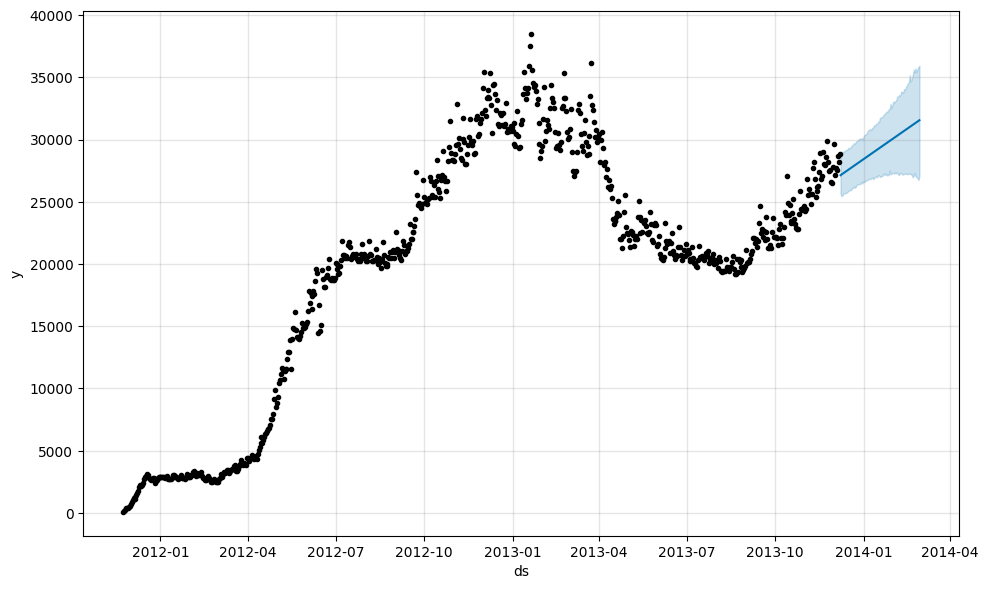

In [ ]:
# Plot the forecast
import matplotlib.pyplot as plt

fig = final_model.plot(prophet_forecast)
plt.show()


In [ ]:
# Extract actual and predicted values
y_true = test_df['y']
y_pred = prophet_forecast['yhat']

# Mean Error (ME)
p_mean_error = np.mean(y_pred - y_true)

# Mean Absolute Error (MAE)
p_mae = mean_absolute_error(y_true, y_pred)

# Root Mean Squared Error (RMSE)
p_rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# R-squared (R^2)
p_r_squared = r2_score(y_true, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {p_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {p_rmse:.2f}")
print(f"R-squared (R^2): {p_r_squared:.2f}")


Mean Absolute Error (MAE): 2769.75
Root Mean Squared Error (RMSE): 4542.43
R-squared (R^2): -1.00
